确保 `import torch` 不报错！

In [1]:
import torch

我的环境 `torch.__version__: 1.8.0` + `python3.8.5`

In [2]:
import torch
print("torch.__version__: {}".format(torch.__version__))

torch.__version__: 1.8.0


### 1.1 实现 `__getitem__` 和 `__len__` 两个magic methods

In [3]:
import os
import torch

from torch.utils.data import Dataset
from torch.utils.data import Sampler


def eg_1_1():
  """
  Eg1.1 : __getitem__, __len__
  """
  x = torch.linspace(-1, 1, 10)
  y = x**2

  class SimpleDataset(Dataset):
    def __init__(self, x, y):
      super().__init__()
      self.x = x
      self.y = y

    def __getitem__(self, index):
      return {"x":self.x[index], "y":self.y[index]}

    def __len__(self):
      return len(self.x)

  simpledataset = SimpleDataset(x, y)
  index = 0
  # __getitem__
  print("simpledataset.__getitem__({}): {}".format(index, simpledataset.__getitem__(index)))
  print("simpledataset[{}]: {}".format(index, simpledataset[index]))
  # __len__
  print("simpledataset.__len__(): {}".format(simpledataset.__len__()))
  print("len(simpledataset): {}".format(len(simpledataset)))

eg_1_1()

simpledataset.__getitem__(0): {'x': tensor(-1.), 'y': tensor(1.)}
simpledataset[0]: {'x': tensor(-1.), 'y': tensor(1.)}
simpledataset.__len__(): 10
len(simpledataset): 10


### 1.2 理解 `MNIST` 类，以及 `transforms` 模块

type(train_dataset): <class 'torchvision.datasets.mnist.MNIST'>
train_dataset[0]: (<PIL.Image.Image image mode=L size=28x28 at 0x7FF837B97640>, 5)
len(train_dataset): 60000


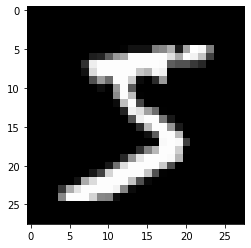

In [4]:
def eg_1_2_0():
  """
  Eg1.2.0 : MNIST
  """
  from torchvision.datasets.mnist import MNIST
  train_dataset = MNIST(root="./mnist_data",
                        train=True,
                        transform=None,
                        download=False)

  print("type(train_dataset): {}".format(type(train_dataset)))  # <class 'torchvision.datasets.mnist.MNIST'>
  index = 0
  print("train_dataset[{}]: {}".format(index, train_dataset[index]))  # (PIL.Image.Image, 5)
  print("len(train_dataset): {}".format(len(train_dataset)))

  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.imshow(train_dataset[index][0], cmap ='gray')
  plt.show()

eg_1_2_0()

In [5]:
def eg_1_2_1():
  """
  Eg1.2.1 : transforms
  """
  from torchvision.datasets.mnist import MNIST
  from torchvision import transforms

  transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize(mean=(0.5,), std=(0.5,))
    ]
  )
  train_dataset = MNIST(root="./mnist_data",
                        train=True,
                        transform=transform,
                        target_transform=None,
                        download=False)

  index = 0
  print("type(train_dataset[{}]): {}".format(index, type(train_dataset[index])))  # <class 'tuple'>
  print("type(train_dataset[{}][0]): {}".format(index, type(train_dataset[index][0])))  # <class 'torch.Tensor'>
  print("train_dataset[{}][0].shape: {}".format(index, train_dataset[index][0].shape))  # torch.Size([1, 28, 28])
  print("type(train_dataset[{}][1]): {}".format(index, type(train_dataset[index][1])))  # <class 'int'>


eg_1_2_1()

type(train_dataset[0]): <class 'tuple'>
type(train_dataset[0][0]): <class 'torch.Tensor'>
train_dataset[0][0].shape: torch.Size([1, 28, 28])
type(train_dataset[0][1]): <class 'int'>


### 1.3 利用 `torchvision.datasets` 中的数据集

In [6]:
def eg_1_3():
  """
  Eg1.3 : VOCSegmentation, VOCDetection
  """
  from torchvision.datasets.voc import VOCSegmentation, VOCDetection

  segmentation_dataset = VOCSegmentation(root="./voc_data",
                                        image_set="train",
                                        transform=None,
                                        download=False)
  detection_dataset = VOCDetection(root="./voc_data",
                                  image_set="train",
                                  transform=None,
                                  download=False)

  index = 0
  print("type(segmentation_dataset[{}]): {}".format(index, type(segmentation_dataset[index])))  # <class 'tuple'>
  print("type(segmentation_dataset[{}][0]): {}".format(index, type(segmentation_dataset[index][0])))  # <class 'PIL.Image.Image'>
  print("type(segmentation_dataset[{}][1]): {}".format(index, type(segmentation_dataset[index][1])))  # <class 'PIL.PngImagePlugin.PngImageFile'>

  print("type(detection_dataset[{}]): {}".format(index, type(detection_dataset[index])))  # <class 'tuple'>
  print("type(detection_dataset[{}][0]): {}".format(index, type(detection_dataset[index][0])))  # <class 'PIL.Image.Image'>
  print("type(detection_dataset[{}][1]): {}".format(index, type(detection_dataset[index][1])))  # <class 'dict'>

eg_1_3()

type(segmentation_dataset[0]): <class 'tuple'>
type(segmentation_dataset[0][0]): <class 'PIL.Image.Image'>
type(segmentation_dataset[0][1]): <class 'PIL.PngImagePlugin.PngImageFile'>
type(detection_dataset[0]): <class 'tuple'>
type(detection_dataset[0][0]): <class 'PIL.Image.Image'>
type(detection_dataset[0][1]): <class 'dict'>


### 1.4 理解 `ImageFolder` 类及其 `classes` 与 `class_to_idx` 属性

In [7]:
def eg_1_4_0():
  """
  Eg1.4.0 : ImageFolder
  """
  from torchvision.datasets import ImageFolder
  from torchvision import transforms

  transform = transforms.Compose(
    [
      transforms.RandomResizedCrop(size=(224, 224)),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
  )
  train_dataset = ImageFolder(root=os.path.join("./flower_data", "train"), transform=transform)

  index = 0
  print("type(train_dataset[{}]): {}".format(index, type(train_dataset[index])))  # <class 'tuple'>
  print("type(train_dataset[{}][0]): {}".format(index, type(train_dataset[index][0])))  # <class 'torch.Tensor'>
  print("train_dataset[{}][0].shape: {}".format(index, train_dataset[index][0].shape))  # torch.Size([3, 224, 224])
  print("type(train_dataset[{}][1]): {}".format(index, type(train_dataset[index][1])))  # <class 'int'>

eg_1_4_0()

type(train_dataset[0]): <class 'tuple'>
type(train_dataset[0][0]): <class 'torch.Tensor'>
train_dataset[0][0].shape: torch.Size([3, 224, 224])
type(train_dataset[0][1]): <class 'int'>


In [8]:
def eg_1_4_1():
  """
  Eg1.4.1 : classes, class_to_idx
  """
  from torchvision.datasets import ImageFolder
  from torchvision import transforms

  transform = transforms.Compose(
    [
      transforms.RandomResizedCrop(size=(224, 224)),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
  )
  train_dataset = ImageFolder(root=os.path.join("./flower_data", "train"), transform=transform)

  print("train_dataset.classes: {}".format(train_dataset.classes))  # ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
  print("train_dataset.class_to_idx: {}".format(train_dataset.class_to_idx))  # {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

eg_1_4_1()

train_dataset.classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
train_dataset.class_to_idx: {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


### 2.0 利用 `torch.utils.data.DataLoader`类

In [9]:
import os
import torch

from torch.utils.data import Dataset
from torch.utils.data._utils import collate
from torchvision import transforms
from torchvision.datasets.mnist import MNIST

transform = transforms.Compose(
  [
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
  ]
)

train_dataset = MNIST(root="./mnist_data",
                      train=True,
                      transform=transform,
                      target_transform=None,
                      download=False)

### 2.1 理解 `__iter__` 这个magic method

In [10]:
def eg_2_1():
  """
  Eg2.1 : __iter__
  """
  from torch.utils.data import DataLoader
  train_loader = DataLoader(dataset=train_dataset,
                            batch_size=10000,
                            shuffle=False)

  print("type(train_loader): {}".format(type(train_loader)))  # <class 'torch.utils.data.dataloader.DataLoader'>
  for batch in train_loader:
    print("type(batch): {}".format(type(batch)))  # <class 'list'>
    print("len(batch): {}".format(len(batch)))  # 2
    print("type(batch[0]): {}".format(type(batch[0])))  # <class 'torch.Tensor'>
    print("type(batch[1]): {}".format(type(batch[0])))  # <class 'torch.Tensor'>
    print("batch[0].shape: {}".format(batch[0].shape))  # torch.Size([10000, 1, 28, 28])
    print("batch[1].shape: {}".format(batch[1].shape))  # torch.Size([10000])
    break

eg_2_1()

type(train_loader): <class 'torch.utils.data.dataloader.DataLoader'>
type(batch): <class 'list'>
len(batch): 2
type(batch[0]): <class 'torch.Tensor'>
type(batch[1]): <class 'torch.Tensor'>
batch[0].shape: torch.Size([10000, 1, 28, 28])
batch[1].shape: torch.Size([10000])


### 2.2 区分 `Dataloader` 与 `Dataset` 的 `__len__`

In [11]:
def eg_2_2():
  """
  Eg2.2 : __len__
  """
  from torch.utils.data import DataLoader
  train_loader = DataLoader(dataset=train_dataset,
                            batch_size=10000,
                            shuffle=False)

  print("len(train_loader): {}".format(len(train_loader)))  # 6
  print("len(train_loader.dataset): {}".format(len(train_loader.dataset)))  # 60000

eg_2_2()

len(train_loader): 6
len(train_loader.dataset): 60000


### 2.3 利用 内置函数 `enumerate` 与 `tqdm` 模块

In [12]:
def eg_2_3_0():
  """
  Eg2.3.0 : enumerate
  """
  from torch.utils.data import DataLoader
  train_loader = DataLoader(dataset=train_dataset,
                            batch_size=10000,
                            shuffle=False)

  for batch, (x, y) in enumerate(train_loader):
    print("batch: {}, type(x): {}, type(y): {}".format(batch, type(x), type(y)))
    # batch: 0, type(x): <class 'torch.Tensor'>, type(y): <class 'torch.Tensor'>
    print("batch: {}, x.shape: {}, y.shape: {}".format(batch, x.shape, y.shape))
    # batch: 0, x.shape: torch.Size([10000, 1, 28, 28]), y.shape: torch.Size([10000])
    break

eg_2_3_0()

batch: 0, type(x): <class 'torch.Tensor'>, type(y): <class 'torch.Tensor'>
batch: 0, x.shape: torch.Size([10000, 1, 28, 28]), y.shape: torch.Size([10000])


In [13]:
def eg_2_3_1():
  """
  Eg2.3.1 : tqdm
  """
  from torch.utils.data import DataLoader
  from tqdm import tqdm
  train_loader = DataLoader(dataset=train_dataset,
                            batch_size=10000,
                            shuffle=False)

  with tqdm(train_loader, desc="TRAINING") as train_bar:
    for (x, y) in train_bar:
      pass

eg_2_3_1()

TRAINING: 100%|██████████| 6/6 [00:11<00:00,  1.89s/it]


### 2.4 有需要可以更改 `collate_fn`

In [14]:
def eg_2_4():
  """
  Eg2.4 : collate_fn
  """
  def collate_fn(batch):
    print("type(batch): {}, len(batch): {}".format(type(batch), len(batch)))  # <class 'list'>, 10000
    x = [i[0] for i in batch]
    y = [i[1] for i in batch]
    x = torch.cat(x)[:,None,...]
    y = torch.Tensor(y)
    return {"x":x, "y":y}

  from torch.utils.data import DataLoader
  from tqdm import tqdm
  train_loader = DataLoader(dataset=train_dataset,
                            batch_size=10000,
                            shuffle=False,
                            collate_fn=collate_fn)

  for batch in train_loader:
    print("type(batch): {}".format(type(batch)))  # <class 'dict'>
    print("type(batch[\"x\"]): {}".format(type(batch["x"])))  # <class 'torch.Tensor'>
    print("type(batch[\"y\"]): {}".format(type(batch["y"])))  # <class 'torch.Tensor'>
    print("batch[\"x\"].shape: {}".format(batch["x"].shape))  # torch.Size([10000, 1, 28, 28])
    print("batch[\"y\"].shape: {}".format(batch["y"].shape))  # torch.Size([10000])
    break

eg_2_4()

type(batch): <class 'list'>, len(batch): 10000
type(batch): <class 'dict'>
type(batch["x"]): <class 'torch.Tensor'>
type(batch["y"]): <class 'torch.Tensor'>
batch["x"].shape: torch.Size([10000, 1, 28, 28])
batch["y"].shape: torch.Size([10000])


### 3.0 继承 `torch.nn.Module`，注意 `super().__init__()`

In [15]:
import os
import torch

from torch.utils.data import Dataset, DataLoader, dataset
from torchvision import models, transforms
from torchvision.datasets.mnist import MNIST

transform = transforms.Compose(
  [
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
  ]
)

train_dataset = MNIST(root="./mnist_data",
                      train=True,
                      transform=transform,
                      target_transform=None,
                      download=False)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=10000,
                          shuffle=True)

In [16]:
def eg_3_0_0():
  """
  Eg3.0.0 : torch.nn.Module
  """
  from torch import nn
  class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(1, 1))
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        return x

  model = SimpleModel()
  print("model: {}".format(model))
  for name, param in model.named_parameters():
    print(name, param)

eg_3_0_0()

model: SimpleModel(
  (conv1): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
  (relu): ReLU(inplace=True)
)
conv1.weight Parameter containing:
tensor([[[[-0.6109]]],


        [[[ 0.3560]]],


        [[[ 0.7688]]]], requires_grad=True)
conv1.bias Parameter containing:
tensor([0.3276, 0.4379, 0.1914], requires_grad=True)


In [17]:
def eg_3_0_1():
  """
  Eg3.0.1 : super().__init__()
  """
  from torch import nn
  class SimpleModel(nn.Module):
    def __init__(self):
        # super(SimpleModel, self).__init__()  # 这一行注释了就会报错
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(1, 1))
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        return x

  model = SimpleModel()
  print("model: {}".format(model))

eg_3_0_1()

model: SimpleModel(
  (conv1): Conv2d(1, 3, kernel_size=(1, 1), stride=(1, 1))
  (relu): ReLU(inplace=True)
)


### 3.1 理解 `__call__` 这个magic method 与自定义 `forward` 关系

In [18]:
def eg_3_1():
  """
  Eg3.1 : __call__  [magic methods]
  """
  from torch import nn
  class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(1, 1))
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        return x

  model = SimpleModel()
  x = train_dataset[0][0]  # torch.Size([1, 28, 28])
  x = x[None, ...]  # torch.Size([1, 1, 28, 28])
  print(model(x) == model.forward(x))

eg_3_1()

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...

### 3.2 注意 `PyTorch` 中数据的摆放 `(B, C, H ,W)`

In [19]:
def eg_3_2():
  """
  Eg3.2 : (B, C, H ,W)
  """
  from torch import nn
  class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(1, 1))
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(1, 1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
        self.linear = nn.Linear(in_features=5*28*28, out_features=10, bias=False)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        print("[before flatten] x.shape: {}".format(x.shape))  # torch.Size([1, 5, 28, 28])
        x = self.flatten(x)
        print("[after flatten] x.shape: {}".format(x.shape))  # torch.Size([1, 3920])
        x = self.linear(x)
        x = self.relu(x)
        return x

  model = SimpleModel()
  x = train_dataset[0][0]  # torch.Size([1, 28, 28])
  x = x[None, ...]  # torch.Size([1, 1, 28, 28])
  model(x)

eg_3_2()

[before flatten] x.shape: torch.Size([1, 5, 28, 28])
[after flatten] x.shape: torch.Size([1, 3920])


### 3.3 调用 `torchvison.models` 中现成的网络

In [20]:
def eg_3_3():
  """
  Eg3.3 : torchvision.models
  """
  from torchvision import models

  model_vgg16 = models.vgg16()
  print("model_vgg16: {}".format(model_vgg16))

  model_resnet50 = models.resnet50()
  print("model_resnet50: {}".format(model_resnet50))

eg_3_3()

model_vgg16: VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=

### 3.4 注意 `torch.nn.Module.dict_state()` `torch.save()` `torch.load()` 以及 `torch.nn.Module.load_state_dict()` 及其中参数

In [21]:
def eg_3_4_0():
  """
  Eg3.4.0 : model.state_dict()
  """
  from torchvision import models

  model_vgg16 = models.vgg16()
  print("model_vgg16.state_dict(): {}".format(model_vgg16.state_dict()))

eg_3_4_0()

model_vgg16.state_dict(): OrderedDict([('features.0.weight', tensor([[[[-0.0058, -0.0429,  0.0137],
          [-0.0189,  0.0206,  0.1407],
          [-0.0653,  0.0660, -0.0481]],

         [[-0.0466,  0.0410,  0.0329],
          [ 0.0776,  0.0679, -0.0501],
          [ 0.0294, -0.0630,  0.0480]],

         [[ 0.0011,  0.0027,  0.0596],
          [-0.0246,  0.0191,  0.0520],
          [-0.0086, -0.0190,  0.0418]]],


        [[[ 0.0062, -0.0272,  0.0264],
          [ 0.0057, -0.0713, -0.0427],
          [-0.0140, -0.0929, -0.0218]],

         [[ 0.0050,  0.0358,  0.1720],
          [ 0.0286, -0.0034,  0.0096],
          [-0.0026, -0.0059,  0.1130]],

         [[-0.1007, -0.0538,  0.0306],
          [-0.0770, -0.0982, -0.0755],
          [-0.0319, -0.0327,  0.0189]]],


        [[[-0.1196, -0.0211,  0.0087],
          [-0.0336, -0.0478, -0.1100],
          [ 0.0894,  0.0243,  0.0103]],

         [[ 0.0776,  0.0885, -0.0192],
          [ 0.0592,  0.0244,  0.0605],
          [-0.0230, -0.0

In [22]:
def eg_3_4_1():
  """
  Eg3.4.1 : torch.save(model.state_dict(), f)
  """
  from torchvision import models

  model_vgg16 = models.vgg16()
  torch.save(model_vgg16.state_dict(), "./vgg16.pth",)

eg_3_4_1()

In [23]:
def eg_3_4_2():
  """
  Eg3.4.2 : model.load_state_dict()
  """
  from torchvision import models

  model_vgg16 = models.vgg16()
  state_dict = torch.load("./vgg16.pth", map_location="cpu")
  missing_keys, unexpected_keys = model_vgg16.load_state_dict(state_dict, strict=True)
  print("missing_keys: {}".format(missing_keys))
  print("unexpected_keys: {}".format(unexpected_keys))

eg_3_4_2()

missing_keys: []
unexpected_keys: []


In [24]:
def eg_3_4_3():
  """
  Eg3.4.3 : strict=False
  """
  from torchvision import models

  model_vgg16 = models.vgg16()
  state_dict = torch.load("./vgg16.pth", map_location="cpu")
  for key in list(state_dict.keys()):
    if ".bias" in key:
      del state_dict[key]

  missing_keys, unexpected_keys = model_vgg16.load_state_dict(state_dict, strict=False)
  print("missing_keys: {}".format(missing_keys))
  print("unexpected_keys: {}".format(unexpected_keys))

eg_3_4_3()

missing_keys: ['features.0.bias', 'features.2.bias', 'features.5.bias', 'features.7.bias', 'features.10.bias', 'features.12.bias', 'features.14.bias', 'features.17.bias', 'features.19.bias', 'features.21.bias', 'features.24.bias', 'features.26.bias', 'features.28.bias', 'classifier.0.bias', 'classifier.3.bias', 'classifier.6.bias']
unexpected_keys: []


### 3.5 利用 `torch.utils.model_zoo.load_url()` 下载预训练参数

In [25]:
def eg_3_5():
  """
  Eg3.5 : torch.utils.model_zoo.load_url()
  """
  from torch.utils import model_zoo
  from torchvision import models

  model_alexnet = models.alexnet()
  state_dict = model_zoo.load_url('http://download.pytorch.org/models/alexnet-owt-7be5be79.pth')
  model_alexnet.load_state_dict(state_dict)

eg_3_5()

### 4.0 调用 `torch.optim` 模块中的优化器

In [26]:
import os
import torch

from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from torchvision.datasets.mnist import MNIST

transform = transforms.Compose(
  [
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
  ]
)

train_dataset = MNIST(root="./mnist_data",
                      train=True,
                      transform=transform,
                      target_transform=None,
                      download=False)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=10000,
                          shuffle=True)
class SimpleModel(nn.Module):
  def __init__(self):
      super(SimpleModel, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(1, 1))
      self.conv2 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(1, 1))
      self.relu = nn.ReLU(inplace=True)
      self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
      self.linear = nn.Linear(in_features=5*28*28, out_features=10, bias=False)

  def forward(self, x):
      x = self.conv1(x)
      x = self.relu(x)
      x = self.conv2(x)
      x = self.relu(x)
      x = self.flatten(x)
      x = self.linear(x)
      x = self.relu(x)
      return x

model = SimpleModel()

In [27]:
def eg_4_0():
  """
  Eg4.0 : torch.optim
  """
  from torch import optim
  optimizer = optim.SGD(params=model.parameters(), lr=0.0001, momentum=0.9)
  print("optim.state_dict(): {}".format(optimizer.state_dict()))

eg_4_0()

optim.state_dict(): {'state': {}, 'param_groups': [{'lr': 0.0001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1, 2, 3, 4]}]}


### 4.1 注意 `params`参数

In [28]:
def eg_4_1():
  """
  Eg4.1 : params
  """
  from torch import optim
  params = [param for name, param in model.named_parameters() if ".bias" in name]
  optimizer = optim.SGD(params=params, lr=0.0001, momentum=0.9)
  print("optim.state_dict(): {}".format(optimizer.state_dict()))

eg_4_1()

optim.state_dict(): {'state': {}, 'param_groups': [{'lr': 0.0001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}


### 4.2 通过 `optimizer.zero_grad()` `loss.backward()` `optimizer.step()` 开始训练

In [29]:
def eg_4_2():
  """
  Eg4.2 : zero_grad(), step()
  """
  from torch import optim
  from tqdm import tqdm
  optimizer = optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)
  loss_fn = nn.CrossEntropyLoss()

  for epoch in range(2):
    with tqdm(train_loader, desc="EPOCH: {}".format(epoch)) as train_bar:
      for (x, y) in train_bar:
        optimizer.zero_grad()
        loss = loss_fn(model(x), y)
        loss.backward()
        optimizer.step()
    print("epoch: {},  loss: {:.6f}".format(epoch, loss))

eg_4_2()

EPOCH: 1:   0%|          | 0/6 [00:00<?, ?it/s]

epoch: 0,  loss: 2.300301


EPOCH: 1: 100%|██████████| 6/6 [00:30<00:00,  5.02s/it]

epoch: 1,  loss: 2.300429


- [x] 综上所述，完成训练！

- [ ] 美化代码，下次一定！